# Data Preparation

My initial task is to prepare and get myself familiar with the dataset [Suomi24-toxicity-annotated](https://huggingface.co/datasets/TurkuNLP/Suomi24-toxicity-annotated).

In [1]:
from datasets import load_dataset

dataset = load_dataset(
    "TurkuNLP/Suomi24-toxicity-annotated",
    split="test",
)

dataset.shuffle()

dataset = dataset.select(range(30))

/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Now that dataset is downloaded, it's a good idea to see in what proportion data is.

/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dty

<Axes: xlabel='count'>

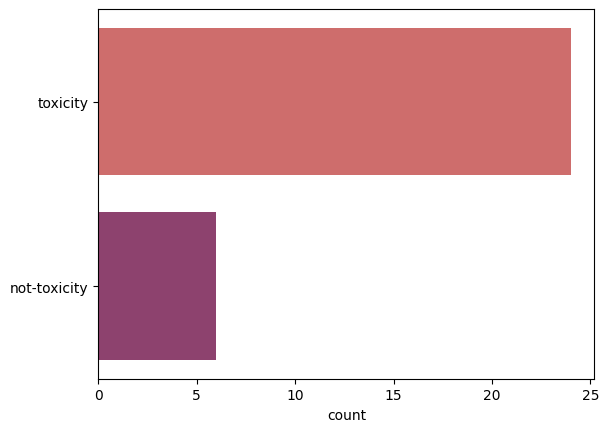

In [2]:
import seaborn as sns

sns.countplot(y=dataset["label"], palette="flare")

I'm doing the data exploratory stages using bert model, because I'm not quite sure at this point how to get word embeddings of `Bloom` model.

In [3]:
from transformers import pipeline

checkpoint = "TurkuNLP/bert-large-finnish-cased-toxicity"
feature_extractor = pipeline("feature-extraction",framework="pt",model=checkpoint)

In [4]:
labels, texts = dataset['label'], dataset['text']

In [5]:
from tqdm import tqdm

wordVecs = []

for text in tqdm(texts):
    e = feature_extractor(texts[0], return_tensors="pt")[0].numpy().mean(axis=0)

    wordVecs.append(e)

100%|██████████| 30/30 [00:10<00:00,  2.94it/s]


/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/roni/dev/thesis/qlora-gpt-fine-tunin

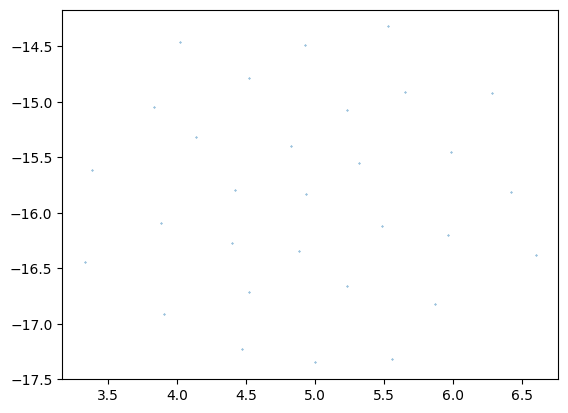

In [6]:
import umap

import matplotlib.pyplot as plt

mapped_embedding = umap.UMAP(random_state=42).fit_transform(wordVecs)
plt.scatter(mapped_embedding[:, 0], mapped_embedding[:, 1], s=0.1, cmap="Spectral")